In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
invest_df = pd.read_excel('/content/2002-2020 num.xlsx')
invest_df.head()

,COUNTRY,INV %GDP,GDPPER,GDPPC,GHGPC,HEALTHGDP,ENERGYPC,CARBONTAX,CARBONTRADE,TEMP,POPGROWTH,REGION,ECTYPE,INCOMEGROUP,PARISAGR
0,1,0.0,1.651554,26527.593091,10.000300,9.394765,50254.640,0,0,0.472000,0.491980,5,2,1,0
1,2,0.0,1.706885,25006.191397,14.815656,8.318211,70828.990,0,0,0.403220,0.448269,5,2,1,0
2,3,0.0,5.871930,2092.982886,6.875136,7.080986,27344.377,0,0,0.106746,-2.170699,1,2,2,0
3,4,0.0,5.820578,6219.473213,4.367896,6.145374,22668.963,0,0,0.400959,0.058871,3,2,1,0
4,5,0.0,1.569855,8060.868703,12.851276,6.177361,47543.316,0,0,0.264522,-0.192902,1,2,1,0


In [ ]:
invest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   COUNTRY      627 non-null    int64  
 1   INV %GDP     627 non-null    float64
 2   GDPPER       627 non-null    float64
 3   GDPPC        627 non-null    float64
 4   GHGPC        627 non-null    float64
 5   HEALTHGDP    627 non-null    float64
 6   ENERGYPC     627 non-null    float64
 7   CARBONTAX    627 non-null    int64  
 8   CARBONTRADE  627 non-null    int64  
 9   TEMP         627 non-null    float64
 10  POPGROWTH    627 non-null    float64
 11  REGION       627 non-null    int64  
 12  ECTYPE       627 non-null    int64  
 13  INCOMEGROUP  627 non-null    int64  
 14  PARISAGR     627 non-null    int64  
dtypes: float64(8), int64(7)
memory usage: 73.6 KB


In [ ]:
invest_df.describe().round(2)

,COUNTRY,INV %GDP,GDPPER,GDPPC,GHGPC,HEALTHGDP,ENERGYPC,CARBONTAX,CARBONTRADE,TEMP,POPGROWTH,REGION,ECTYPE,INCOMEGROUP,PARISAGR
count,627.00,627.00,627.00,627.00,627.00,627.00,627.00,627.00,627.00,627.00,627.00,627.00,627.00,627.00,627.00
mean,17.00,0.00,2.08,32123.78,10.15,8.08,46402.29,0.34,0.70,0.53,0.24,2.67,1.97,1.21,0.24
std,9.53,0.00,3.92,24921.26,4.22,1.88,29264.19,0.47,0.46,0.39,0.79,1.43,0.17,0.48,0.42
min,1.00,0.00,-15.14,911.91,0.00,4.12,0.00,0.00,0.00,0.00,-2.26,1.00,1.00,1.00,0.00
25%,9.00,0.00,0.77,12609.66,6.95,6.59,28416.73,0.00,0.00,0.25,-0.26,2.00,2.00,1.00,0.00
50%,17.00,0.00,2.24,24288.27,9.11,8.17,38938.44,0.00,1.00,0.44,0.24,2.00,2.00,1.00,0.00
75%,25.00,0.00,4.05,46931.15,12.54,9.55,52706.01,1.00,1.00,0.72,0.68,3.00,2.00,1.00,0.00
max,33.00,0.01,24.48,123678.70,27.96,12.82,188294.00,1.00,1.00,2.25,2.89,5.00,2.00,3.00,1.00


In [ ]:
invest_df.isnull().sum()

Country                                          0
Year                                             0
INV %GDP                                         0
GDP growth, %                                    0
GDP per capita (current US$)                     0
GHG Per-capita greenhouse gas emissions, tons    0
health expenditure (% of GDP)                    0
Energy consumption per capita (kWh/person)       0
Carbon tax                                       0
carbon emissions trading system                  0
Annual temperature anomalies, С                  0
Population growth (annual %)                     0
Region                                           0
Economy type                                     0
Income group                                     0
Paris Agreement joined                           0
dtype: int64

In [ ]:
corr_matrix = invest_df.corr().round(2)
corr_matrix

,COUNTRY,INV %GDP,GDPPER,GDPPC,GHGPC,HEALTHGDP,ENERGYPC,CARBONTAX,CARBONTRADE,TEMP,POPGROWTH,REGION,ECTYPE,INCOMEGROUP,PARISAGR
COUNTRY,1.00,-0.06,0.07,-0.06,-0.21,-0.16,-0.13,0.10,-0.23,-0.01,0.12,-0.13,-0.26,0.34,-0.03
INV %GDP,-0.06,1.00,-0.02,0.04,0.06,0.02,0.03,0.13,0.11,0.18,0.02,-0.02,0.03,-0.08,0.25
GDPPER,0.07,-0.02,1.00,-0.11,0.05,-0.37,-0.03,-0.00,-0.21,-0.01,-0.01,-0.13,-0.14,0.11,-0.10
GDPPC,-0.06,0.04,-0.11,1.00,0.49,0.46,0.59,0.25,0.35,0.00,0.70,0.47,0.16,-0.45,0.11
GHGPC,-0.21,0.06,0.05,0.49,1.00,-0.04,0.67,0.17,-0.00,-0.06,0.42,0.07,0.18,-0.20,-0.13
HEALTHGDP,-0.16,0.02,-0.37,0.46,-0.04,1.00,0.21,0.14,0.30,-0.00,0.25,0.50,0.32,-0.39,0.16
ENERGYPC,-0.13,0.03,-0.03,0.59,0.67,0.21,1.00,0.22,0.06,-0.05,0.51,0.13,0.17,-0.27,-0.02
CARBONTAX,0.10,0.13,-0.00,0.25,0.17,0.14,0.22,1.00,0.22,0.07,0.07,-0.20,0.13,-0.20,0.17
CARBONTRADE,-0.23,0.11,-0.21,0.35,-0.00,0.30,0.06,0.22,1.00,0.14,0.05,0.07,0.27,-0.49,0.27
TEMP,-0.01,0.18,-0.01,0.00,-0.06,-0.00,-0.05,0.07,0.14,1.00,-0.06,-0.07,-0.01,0.07,0.25


In [ ]:
X = invest_df[['COUNTRY', 'GDPPER', 'GDPPC','GHGPC','HEALTHGDP','ENERGYPC','CARBONTAX','CARBONTRADE', 'TEMP', 'POPGROWTH', 'REGION', 'ECTYPE', 'INCOMEGROUP', 'PARISAGR']]
y = invest_df['INV %GDP']

In [ ]:
X.head()

,COUNTRY,GDPPER,GDPPC,GHGPC,HEALTHGDP,ENERGYPC,CARBONTAX,CARBONTRADE,TEMP,POPGROWTH,REGION,ECTYPE,INCOMEGROUP,PARISAGR
0,1,1.651554,26527.593091,10.000300,9.394765,50254.640,0,0,0.472000,0.491980,5,2,1,0
1,2,1.706885,25006.191397,14.815656,8.318211,70828.990,0,0,0.403220,0.448269,5,2,1,0
2,3,5.871930,2092.982886,6.875136,7.080986,27344.377,0,0,0.106746,-2.170699,1,2,2,0
3,4,5.820578,6219.473213,4.367896,6.145374,22668.963,0,0,0.400959,0.058871,3,2,1,0
4,5,1.569855,8060.868703,12.851276,6.177361,47543.316,0,0,0.264522,-0.192902,1,2,1,0


In [ ]:
set(list(y))

{0.0,
 7.832163927111839e-08,
 1.2704871128183687e-07,
 1.660677606751835e-07,
 1.901088393329526e-07,
 1.9945725698988446e-07,
 2.0155078010465526e-07,
 2.4425880902213023e-07,
 2.953136669394562e-07,
 4.247039534076259e-07,
 4.625326328805744e-07,
 4.72746024309292e-07,
 5.110292191241807e-07,
 5.397014345119984e-07,
 5.816636873468676e-07,
 6.418714302958177e-07,
 7.081693044258134e-07,
 7.370048592999259e-07,
 8.018464573287116e-07,
 8.520295152385596e-07,
 9.27505304160061e-07,
 1.0711699289878666e-06,
 1.2193600700521649e-06,
 1.2329643882031817e-06,
 1.2928046425033928e-06,
 1.3395166364630249e-06,
 1.5679862754198913e-06,
 1.6798746585381249e-06,
 1.6810169476015008e-06,
 1.7385116521070055e-06,
 1.814194836951186e-06,
 1.9154920410248536e-06,
 1.939119518125716e-06,
 1.9910088671931834e-06,
 2.084852489247494e-06,
 2.1095441264293827e-06,
 2.1169270028271708e-06,
 2.124847432976686e-06,
 2.156248827229881e-06,
 2.2299996144066744e-06,
 2.2888662835506773e-06,
 2.31791722360563

In [ ]:
y=y*1000

In [ ]:
[item for item in invest_df]

['COUNTRY',
 'INV %GDP',
 'GDPPER',
 'GDPPC',
 'GHGPC',
 'HEALTHGDP',
 'ENERGYPC',
 'CARBONTAX',
 'CARBONTRADE',
 'TEMP',
 'POPGROWTH',
 'REGION',
 'ECTYPE',
 'INCOMEGROUP',
 'PARISAGR']

In [ ]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split

# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
y_pred = model.predict(X_test)

# выведем первые пять значений с помощью диапазона индексов
print(y_pred[:5])

[0.22389466 0.27566732 0.27093801 0.20127731 0.08426313]


In [ ]:
print(y_test[:5])

580    0.303369
590    0.285568
550    0.001233
213    0.000000
485    0.000078
Name: INV %GDP, dtype: float64


In [ ]:
from sklearn import metrics

# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root Mean Squared Error (RMSE): 0.4564890834848232


In [ ]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.1


In [ ]:
mean_regr = X.mean(axis=0)
std_regr = X.std(axis=0)
X -= mean_regr
X /= std_regr


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.1


Feature: 0, Score: -0.00222
Feature: 1, Score: -0.00162
Feature: 2, Score: -0.06546
Feature: 3, Score: 0.04588
Feature: 4, Score: -0.01778
Feature: 5, Score: -0.00088
Feature: 6, Score: 0.04455
Feature: 7, Score: 0.00938
Feature: 8, Score: 0.09124
Feature: 9, Score: 0.01477
Feature: 10, Score: 0.01632
Feature: 11, Score: 0.00138
Feature: 12, Score: -0.04688
Feature: 13, Score: 0.12161


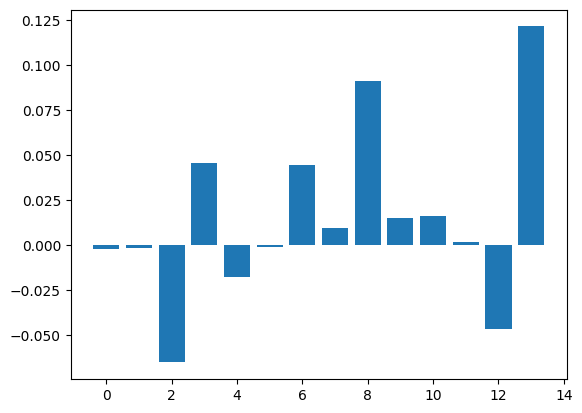

value big - important


KeyError: 0

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

#see full docs here https://scikit-learn.org/stable/modules/linear_model.html
# fit the model
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
print("value big - important")

#score - Ordinary Least Squares
score_test=model.score(X_test,y_test)
score_train=model.score(X_train, y_train)

yhat = model.predict(X_test)

for i in range(10):
	print("real is "+str(y_test[i])+";  predicted is "+str(yhat[i]))

print("--------")
print("train "+str(score_train))
print("test "+str(score_test))

Feature: 0, Score: 0.02731
Feature: 1, Score: 0.00206
Feature: 2, Score: 0.01498
Feature: 3, Score: 0.42199
Feature: 4, Score: 0.00615
Feature: 5, Score: 0.04812
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00046
Feature: 8, Score: 0.40525
Feature: 9, Score: 0.04384
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.02977


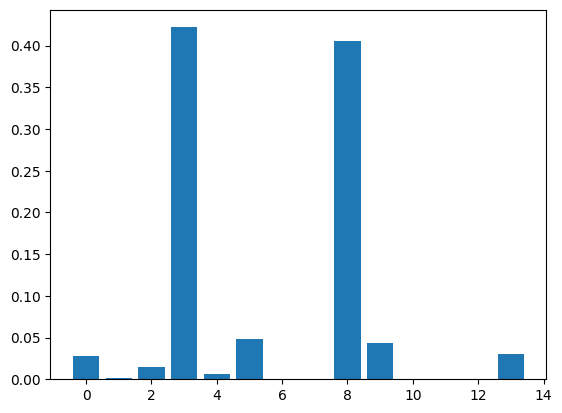

KeyError: 0

In [ ]:
#experiment N3 with Decision tree refression

# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

score_test=model.score(X_test,y_test)
score_train=model.score(X_train, y_train)

yhat = model.predict(X_test)

for i in range(10):
	print("real is "+str(y_test[i])+";  predicted is "+str(yhat[i]))

print("--------")
print("train "+str(score_train))
print("test "+str(score_test))


In [ ]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.1


In [ ]:
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 0.4564890834848232


In [ ]:
a = model.predict(X)

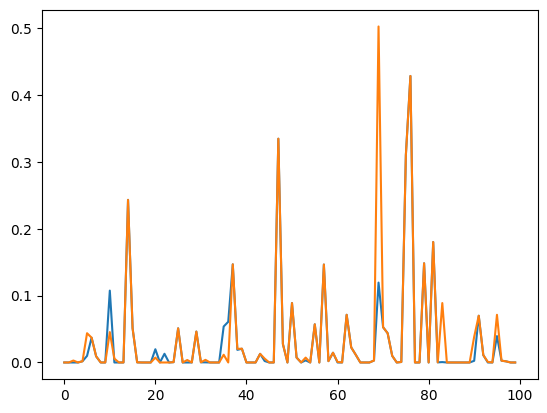

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(y)[300:400])
plt.plot(a[300:400])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y)
plt.plot(a)

NameError: name 'y' is not defined

In [ ]:
a > 9

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
for index, value in enumerate(a):
  if value > 9:
    print(index)


292
600


Feature: 0, Score: 0.03737
Feature: 1, Score: 0.05943
Feature: 2, Score: 0.04747
Feature: 3, Score: 0.07972
Feature: 4, Score: 0.07640
Feature: 5, Score: 0.07982
Feature: 6, Score: 0.01447
Feature: 7, Score: 0.01857
Feature: 8, Score: 0.34080
Feature: 9, Score: 0.13973
Feature: 10, Score: 0.02155
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01629
Feature: 13, Score: 0.06839


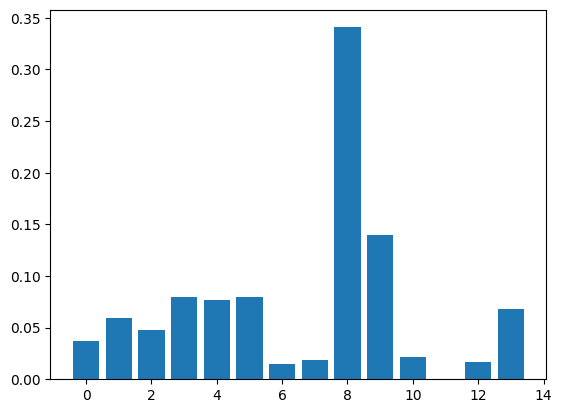

KeyError: 0

In [ ]:
#experiment N5 with Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

score_test=model.score(X_test,y_test)
score_train=model.score(X_train, y_train)

yhat = model.predict(X_test)

for i in range(10):
	print("real is "+str(y_test[i])+";  predicted is "+str(yhat[i]))

print("--------")
print("train "+str(score_train))
print("test "+str(score_test))


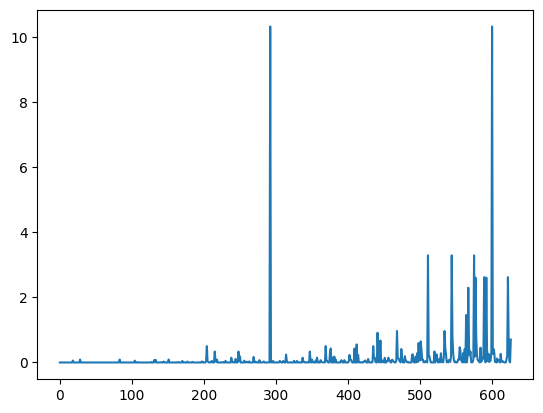

In [ ]:
plt.plot(a)

In [ ]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from flaml import AutoML

In [ ]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 100,  # in seconds
    "metric": "r2",
    "task": "regression",
    "log_file_name": "california.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)
# Predict
print(automl.predict(X_train))
# Print the best model
print(automl.model.estimator)

[flaml.automl.logger: 05-11 19:08:12] {1680} INFO - task = regression
[flaml.automl.logger: 05-11 19:08:12] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 05-11 19:08:12] {1789} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 05-11 19:08:12] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 05-11 19:08:12] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-11 19:08:12] {2345} INFO - Estimated sufficient time budget=4328s. Estimated necessary time budget=31s.
[flaml.automl.logger: 05-11 19:08:12] {2392} INFO -  at 0.5s,	estimator lgbm's best error=1.2688,	best estimator lgbm's best error=1.2688
[flaml.automl.logger: 05-11 19:08:12] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-11 19:08:12] {2392} INFO -  at 0.6s,	estimator lgbm's best error=1.2688,	best estimator lgbm's best error=1.2688
[flaml.automl.logger: 05-11 19:08:12] {2219} INFO - 

In [ ]:
dir(automl.model)

['DEFAULT_ITER',
 'HAS_CALLBACK',
 'ITER_HP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_callback',
 '_callbacks',
 '_estimator_type',
 '_fit',
 '_mem_per_iter',
 '_model',
 '_preprocess',
 '_task',
 '_time_per_iter',
 '_train_size',
 'classes_',
 'cleanup',
 'config2params',
 'cost_relative2lgbm',
 'estimator',
 'estimator_class',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_params',
 'init',
 'model',
 'n_features_in_',
 'params',
 'predict',
 'predict_proba',
 'score',
 'search_space',
 'size']

In [ ]:
print(automl.model.feature_importances_)

[117 135 166 141 171 105   0  15  83 101  87   0   0  51]


<BarContainer object of 14 artists>

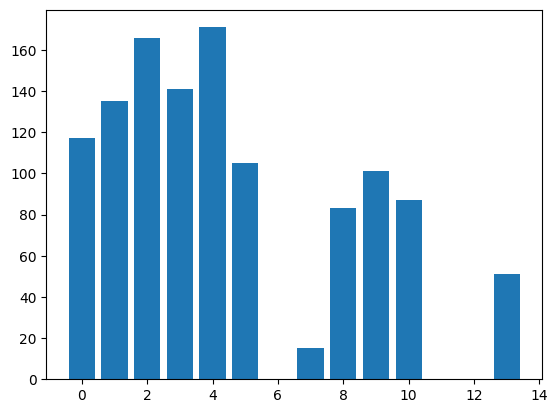

In [ ]:
importance = automl.model.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)

In [ ]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.1


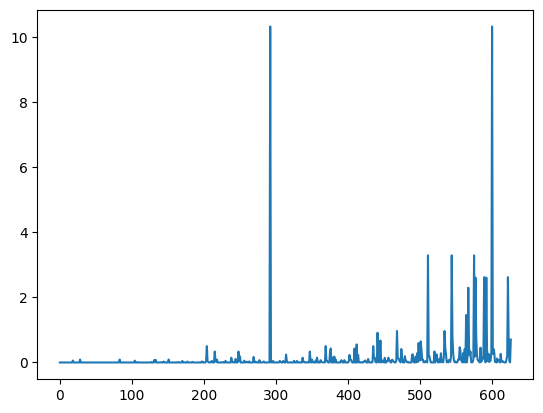

In [ ]:
plt.plot(a)

Программирование в R

In [ ]:
rm(list = ls())

library(haven) # <- enables R to read and write various data formats
library(vtable)
library(stargazer) # <- publication quality tables
library(ggpubr)  # <- plots ("ggscatter" & others)
library(lattice) # <- xyplot
library(plotly)  # <- graphing library ("plot_ly")
library(dplyr) # <- data manipulation
library(psych)
install.packages('readxl')
library (readxl)

#загрузка данных
data <- read_excel('C:\\Users\\Lida\\Desktop\\мага диплом\\Данные\\R tests\\2002-2020 num.xlsx')

summary(data)

describe(data)

str(data)

head(data)
tail(data)

#убираем колонку со странами, чтобы не мешала делать анализ
data <- select(data, -c(Country)
head(data)

#фактические коэффициенты линейной корреляции для каждой пары переменных:

install.packages("GGally")
library(GGally)
ggpairs(data)

pairs(data)

hist(data$'INVNORM')

cor(data)


#регрессия

#1
model <- lm(INVNORM ~ YEAR + CARBONTAX + CARBONTRADE + TEMP + REGION + REGION + PARISAGR, data = data)
hist(residuals(model), col = "steelblue")
summary(model)
car::vif(model)

#2
model <- lm(INVNORM ~ YEAR + GDPPC + GDPPER + CARBONTAX + CARBONTRADE + TEMP + REGION + REGION + PARISAGR, data = data)
hist(residuals(model), col = "steelblue")
summary(model)

#3
model <- lm(INVNORM ~ YEAR + ENERGYPC + CARBONTAX + CARBONTRADE + TEMP + REGION + REGION + PARISAGR, data = data)
hist(residuals(model), col = "steelblue")
summary(model)

#4
model <- lm(INVNORM ~ YEAR + ENERGYPC + CO2SHARE + TEMP + REGION + REGION + PARISAGR, data = data)
hist(residuals(model), col = "steelblue")
summary(model)

#5
model <- lm(INVNORM ~ YEAR + GDPPC + GDPPER + ENERGYPC + CO2SHARE + TEMP + REGION + REGION + PARISAGR, data = data)
hist(residuals(model), col = "steelblue")
summary(model)

#fixed model
library(plm)
fixed <- plm(INVNORM ~ YEAR + CARBONTAX + CARBONTRADE + TEMP + REGION + REGION + PARISAGR, data = data, index=c("COUNTRY"), model="within")
summary(fixed)


library(plm)
fixed <- plm(INVNORM ~ CARBONTAX + CARBONTRADE + TEMP + REGION + REGION + PARISAGR, data = data, index=c("COUNTRY", "YEAR"), model="within")
summary(fixed)
